# Ejemplo 1. Diseño de Filtro Pasa-Bajos y Pasa-Altos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

### Diseño del pasa-bajos

Para efectos del ejemplo, vamos a asumir que el rizado permitido es grande y vamos a usar siempre la ventana rectangular.

In [2]:
fc = 1e3
fs = 10*fc
wc = 2*np.pi*fc/fs # frecuencia de corte normalizada en radianes
M = 101
n = np.arange(-M//2+1, M//2+1) # Vector de muestras
hi = wc/np.pi * np.sinc(wc*n/np.pi) # Respuesta del filtro ideal
win = np.ones(M)
h_n = hi*win # Multiplico la respuesta ideal por la ventana
w, h = sp.freqz(h_n, 1, whole=True)

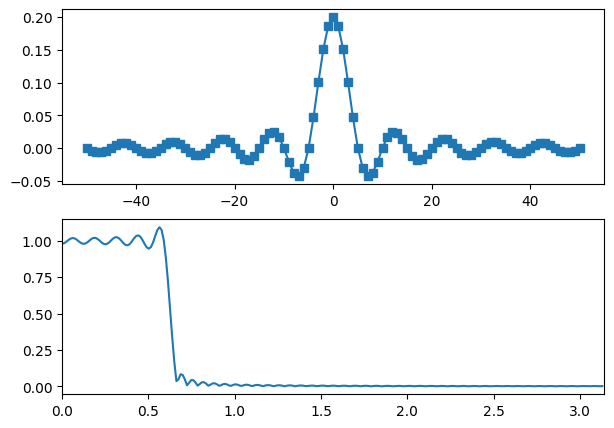

In [3]:
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.plot(n, h_n, marker='s')

plt.subplot(212)
plt.plot(w-np.pi, np.abs(np.fft.fftshift(h)))
plt.xlim([0, np.pi])
plt.show()

### Diseño del pasa-altos a partir del filtro pasa-bajos por inversión espectral

La teoria dice que debemos restar un filtro pasa-todo con el pasa-bajos para dar como resultado un filtro pasa-altos. En el dominio del n, un filtro pasa-todo es una función delta $\delta [n]$

In [4]:
delta = np.zeros(M) # Vector de ceros de tamaño M que coindice con el tamaño de h
delta[M//2] = 1 # Se pone un 1 en la pos [0] para formar la función delta
h_high_n = delta - hi # Recordar que h_n es el filtro pasa-bajos diseñado en el paso anterior
w, h = sp.freqz(h_high_n, 1, whole=True)

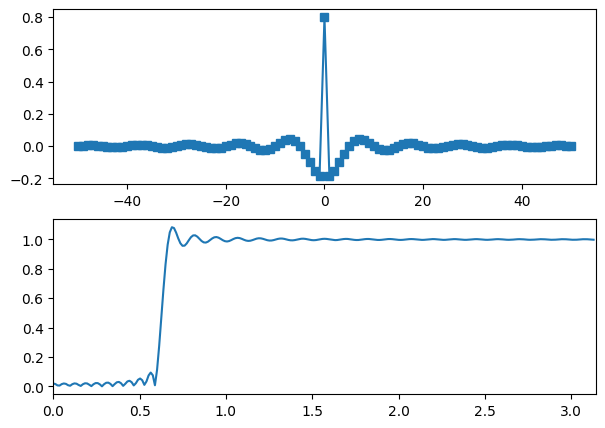

In [5]:
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.plot(n, h_high_n, marker='s')

plt.subplot(212)
plt.plot(w-np.pi, np.abs(np.fft.fftshift(h)))
plt.xlim([0, np.pi])
plt.show()

Se ve que efectivamente se generó un filtro pasa-altos a partir del pasa-bajos.